In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [8]:
df = pd.read_csv('/Users/morganfry/Documents/UNIVERSITY WORK/Intro to Business Analytics/Homework 2 - 2nd May/kaggle_hr_analytics.csv')

In [11]:
df = df.drop_duplicates()

df = df.rename(columns={'sales':'department'})

In [12]:
df_encoded = pd.get_dummies(df, columns=['department', 'salary'], prefix=['department', 'salary'])

Best max_depth: 18
Best CV score: 0.983111856969065


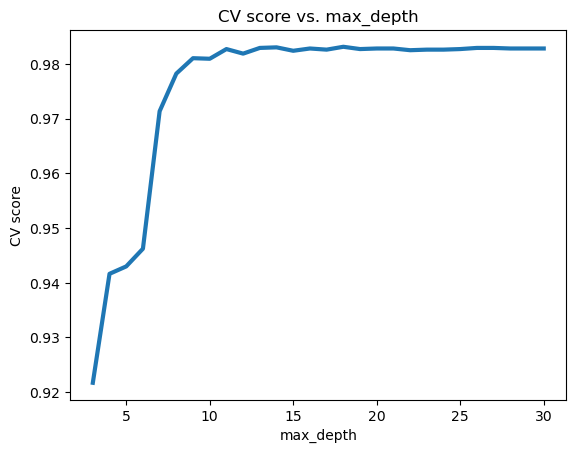

Accuracy: 0.9829095456440183
AUC: 0.9708406516549047


In [14]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

X = df_encoded.drop('left', axis=1)

y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestClassifier(n_estimators=75, random_state=0)

param_grid = {'max_depth': list(range(3, 31, 1))}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']

best_score = grid_search.best_score_

print(f"Best max_depth: {best_max_depth}")

print(f"Best CV score: {best_score}")

scores = grid_search.cv_results_['mean_test_score']

max_depths = list(range(3, 31, 1))

plt.plot(max_depths, scores, linewidth=3.0)
plt.xlabel('max_depth')
plt.ylabel('CV score')
plt.title('CV score vs. max_depth')
plt.show()

rf2 = RandomForestClassifier(n_estimators=75, random_state=1, max_depth=best_max_depth)

rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

y_pred_proba = rf2.predict_proba(X_test)[:,1]  

auc = metrics.roc_auc_score(y_test, y_pred_proba)

print("AUC:", auc)